In [289]:
def contact_angle(names):
    import csv
    from numpy import genfromtxt
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
    for index, name in enumerate(names):
        fd = genfromtxt('../ContactAngle/{}.csv'.format(name), delimiter='\t')
        x = []
        y = []
        yerr = []
        for i in range(len(fd)):
            x.append(fd[i][0])
            y.append(np.mean(fd[i][1:]))
            yerr.append(np.std(fd[i][1:]))
        # only fit data in certain range
        x1,y1 = [],[]

        for i in range(len(x)):
            x1.append(x[i])
            y1.append(y[i])

        z1, pcov = np.polyfit(x1, y1, 3, cov = True)
        p1 = np.poly1d(z1)
        print(p1)
        perr = np.sqrt(np.diag(pcov))

        # prepare confidence level curves
        nstd = 0.05 # to draw 1-sigma intervals
        p1_up = p1 + nstd * perr
        p1_dw = p1 - nstd * perr

        # find max value
        xp1 = np.linspace(0, 13, 1000)
        maxpH = 0
        for i in range(len(xp1)):
            if p1(xp1[i]) >= p1(maxpH):
                maxpH = xp1[i]
        maxAn = p1(maxpH)
        print('max pH value: {:.4f}'.format(maxpH), 'max angle: {:.4f}'.format(maxAn))

        fig, axs = plt.subplots(figsize=(18, 15))
        plt.subplot(3, 3, index * 3 + 1)
        _ = plt.plot(xp1, p1(xp1), '-')
        
        plt.fill_between(xp1, p1_up(xp1), p1_dw(xp1), facecolor='green', alpha=0.3)
        plt.scatter(x,y,color = 'black')
        plt.errorbar(x, y, yerr = yerr, fmt='o')
        plt.xlabel('pH_value')
        plt.ylabel('contact angle')

        # surface potential part

        r = 0.07199 # N/m
        d = 0.9*10**(-9) # debye length in 0.1M KCl
        k = 1.38 *10**(-23) # J/K
        T = 298 # Kelvin
        e0 = 8.85 * 10**(-12) # F/m
        er = 80
        e = 1.6*10**(-19) # C
        z = 1 # valency
        a = 4*((k*T)**2)*e0*er/(d*e**2) # first term on the right hand
        y = np.array(y)
        left = np.cos(y * np.pi / 180.)-np.cos(maxAn* np.pi / 180.)
        left = np.array(left)
        left = np.maximum(0, left)
        right = np.arccosh(r*left/a+1) # second term + 1
        fi = right*2*k*T/(z*e) # surface potential
        sigma = 2*k*T*e0*er*np.sinh(z*e*fi/(2*k*T))/(z*e*d)
        plt.subplot(3, 3, index * 3 + 2)
        plt.scatter(x, fi*1000)
        plt.xlim(0.5,13)
        plt.ylim(-10, 300)
        plt.xlabel('pH_value')
        plt.ylabel('Surface potential (mV)')

        # surface charge part
        plt.subplot(3, 3, index * 3 + 3)
        plt.scatter(x, sigma)
        plt.xlim(0.5,13)
        plt.ylim(-0.1, 1)
        plt.xlabel('pH_value')
        plt.ylabel('Surface charge density (C/m^2)')
        plt.savefig("{}_charge.png".format(name))
    
    return maxAn

           3         2
-0.002672 x - 1.443 x + 17.76 x + 11.03
max pH value: 6.0511 max angle: 65.1030
          3         2
-0.04396 x + 0.225 x + 2.69 x + 64.78
max pH value: 6.5325 max angle: 79.7052
         3         2
-0.0348 x - 0.103 x + 5.585 x + 43.87
max pH value: 6.3894 max angle: 66.2809


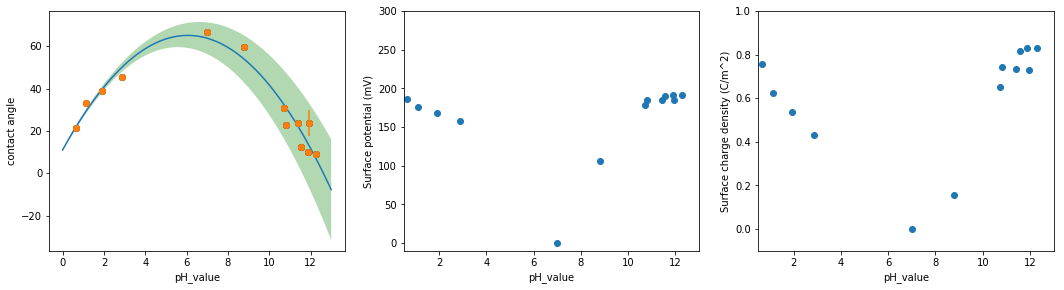

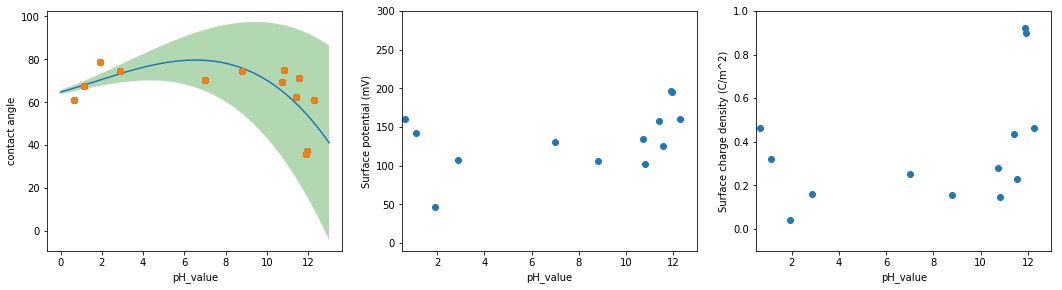

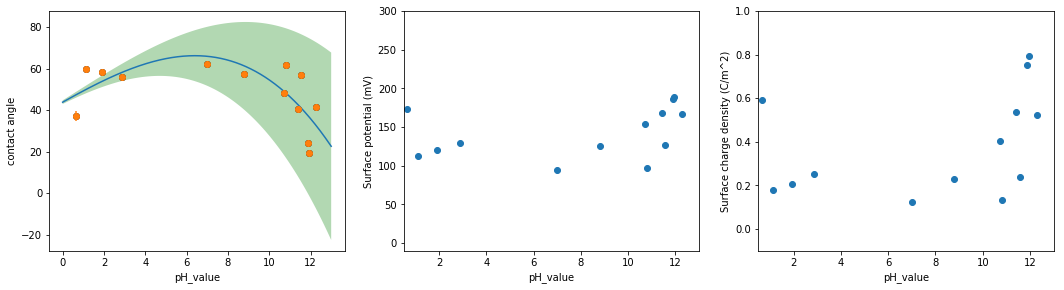

In [290]:
maxAng = contact_angle(['fW', 'mW', 'Pt'])

In [343]:
def contact_angle_potential(index, name):
    import csv
    from numpy import genfromtxt
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
    fd = genfromtxt('../ContactAngle/{}.csv'.format(name[0]), delimiter='\t')
    x = []
    y = []
    yerr = []
    for i in range(len(fd)):
        x.append(fd[i][0])
        y.append(np.mean(fd[i][1:]))
        yerr.append(np.std(fd[i][1:]))

    x = np.array(x)*(-0.0592) + name[1] - name[2] # convert pH to potential with Nernst eqn.
    # only fit data in certain range
    x1,y1 = [],[]

    for i in range(len(x)):
        x1.append(x[i])
        y1.append(y[i])

    z1, pcov = np.polyfit(x1, y1, 3, cov = True)
    p1 = np.poly1d(z1)
    print(p1)
    perr = np.sqrt(np.diag(pcov))

    # prepare confidence level curves
    nstd = 1 # to draw 1-sigma intervals
    p1_up = p1 + nstd * perr
    p1_dw = p1 - nstd * perr

    # find max value
    xp1 = np.linspace(min(x1), max(x1), 1000)
    maxpH = 0
    for i in range(len(xp1)):
        if p1(xp1[i]) >= p1(maxpH):
            maxpH = xp1[i]
    maxAn = p1(maxpH)
    print('max E value: {:.4f}'.format(maxpH), 'max angle: {:.4f}'.format(maxAn))

    fig, axs = plt.subplots(figsize=(18, 15))
    plt.subplot(3, 3, index * 3 + 1)
    _ = plt.plot(xp1, p1(xp1), '-')

    plt.fill_between(xp1, p1_up(xp1), p1_dw(xp1), facecolor='green', alpha=0.3)
    plt.scatter(x,y,color = 'black')
    plt.errorbar(x, y, yerr = yerr, fmt='o')
    #plt.xlim(-0.9, 0)
    plt.ylim(0, 90)
    plt.xlabel('potential (V)')
    plt.ylabel('contact angle')

    # surface potential part

    r = 0.07199 # N/m
    d = 0.9*10**(-9) # debye length in 0.1M KCl
    k = 1.38 *10**(-23) # J/K
    T = 298 # Kelvin
    e0 = 8.85 * 10**(-12) # F/m
    er = 80
    e = 1.6*10**(-19) # C
    z = 1 # valency
    a = 4*((k*T)**2)*e0*er/(d*e**2) # first term on the right hand
    
    def func_sinh(x, a, c):
        return 1/a * np.sinh(a*x) + c
    
    y = np.array(y)
    left = np.cos(y * np.pi / 180.)-np.cos(maxAn* np.pi / 180.)
    left = np.array(left)
    left = np.maximum(0, left)
    right = np.arccosh(r*left/a+1) # second term + 1
    
    fi = right*2*k*T/(z*e) # surface potential
    for i, num in enumerate(x):
        if num < name[1]:
            fi[i] = -fi[i] 
    sigma = 2*k*T*e0*er*np.sinh(z*e*fi/(2*k*T))/(z*e*d)
    plt.subplot(3, 3, index * 3 + 2)
    plt.scatter(x, fi*1000)
    
    #plt.xlim(0.5,13)
    #plt.ylim(-10, 300)
    plt.xlabel('potential (V)')
    plt.ylabel('Surface potential (mV)')

    # surface charge part
    
    ps, ps_cov = curve_fit(func_sinh, x, sigma)
    print(ps)
    
    pserr = np.sqrt(np.diag(ps_cov))
    # prepare confidence level curves
    nstd_ps = 1 # to draw 1-sigma intervals
    ps_up = ps + nstd_ps * pserr
    ps_dw = ps - nstd_ps * pserr
    
    plt.subplot(3, 3, index * 3 + 3)
    plt.scatter(x, sigma)
    _ = plt.plot(xp1, func_sinh(xp1, *ps), '-')
    plt.fill_between(xp1, func_sinh(xp1, *ps_up), func_sinh(xp1, *ps_dw), facecolor='green', alpha=0.3)
    #plt.xlim(0.5,13)
    #plt.ylim(-0.1, 1)
    plt.xlabel('potential (V)')
    plt.ylabel('Surface charge density (C/m^2)')
    plt.savefig("{}_charge.png".format(name[0]))
    
    return maxAn

       3         2
12.88 x - 403.7 x - 466.7 x - 67.38
max E value: -0.5627 max angle: 65.1030
[2.30343521 0.8972314 ]
       3         2
211.9 x + 30.12 x - 50.5 x + 67.37
max E value: -0.3329 max angle: 79.7052
[1.99466574 0.30453273]
       3         2
167.7 x + 73.47 x - 85.33 x + 24.8
max E value: -0.5826 max angle: 66.2809
[1.37747349 0.62699128]


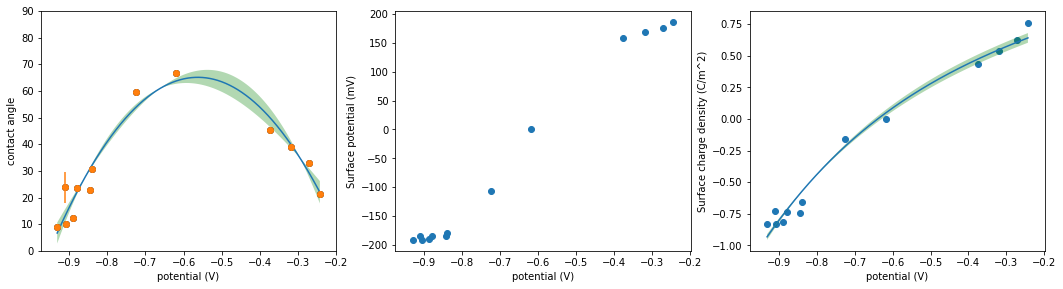

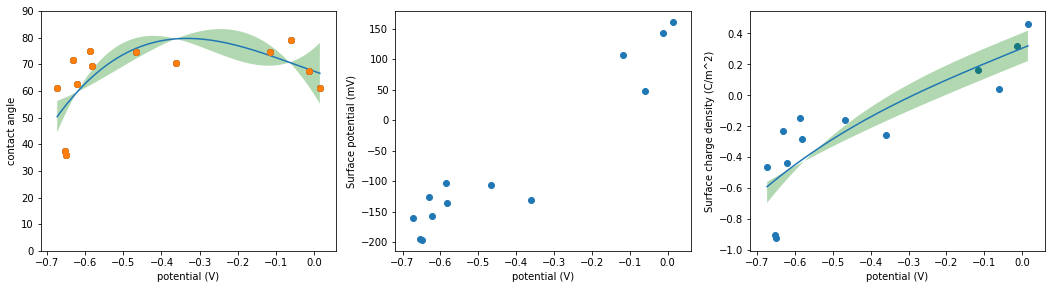

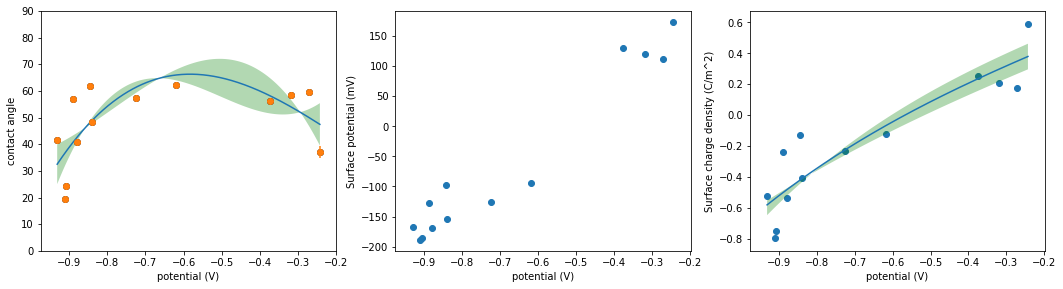

In [344]:
for index, name in enumerate([('fW',-0.563,-0.3586), ('mW',-0.333,-0.3866), ('Pt',-0.583,-0.3786)]):
    maxAng = contact_angle_potential(index, name)